In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 7.0)
np.set_printoptions(suppress=True) # Don't print scietific numbers form

# 1. Multi-class Classification

1.1 Dataset

In [2]:
from scipy.io import loadmat

data = loadmat('ex3/ex3data1.mat')
data.keys()

dict_keys(['__header__', '__globals__', 'X', '__version__', 'y'])

In [3]:
X = np.c_[np.ones( data['X'].shape[0] ), data['X']]
y = data['y']

m = X.shape[0] # number of training examples
n = X.shape[1] # number of features (with bias unit)

1.2 Visualizing the data

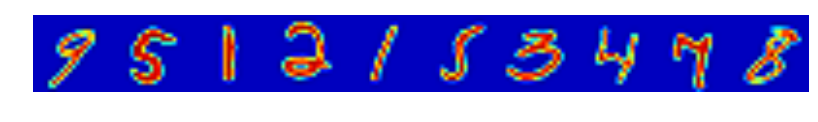

In [4]:
sample = np.random.randint( 0, X.shape[0] + 1, 10 )
data_plot = X[sample, 1: ].reshape( -1, 20 ).T # Make a 20X20 array and rotate
img = plt.imshow(data_plot)
plt.axis('off');

# 1.3 Vectorizing Logistic Regression

1.3.3 Vectorizing regularized logistic regression

In [5]:
# minimize(fun, x0[, args, method, jac, hess, ...]) performs a minimization of scalar function of one or more variables.
from scipy.optimize import minimize

In [6]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

In [7]:
def reg_cost_function( theta, X, y, lmda ):  # lmda, *args ):
    m = X.shape[0]
    h = sigmoid( np.dot(X, theta) )

    J = (-1/m) * ( y.T.dot( np.log(h) ) + (1 - y.T).dot( np.log( 1 - h ) ) ) + ( lmda/(2*m) ) * np.sum( np.square(theta[1:]) )

    if np.isnan(J[0]):
        return(np.inf)
    return ( J[0] )

In [8]:
def reg_gradient( theta, X, y, lmda ): #lmda, *args ):
    n = X.shape[1]
    theta = np.array(theta).reshape(n,1)
    m = X.shape[0]
    h = sigmoid( np.dot(X, theta) )
    # No summation this time, need to add theta0
    grad = ((1/m) * (h - y).T.dot( X )).T + (lmda/m) * np.r_[ [[0]], theta[1:] ] 
    return grad.flatten()

# 1.4 One-vs-all Classification

In [9]:
def one_vs_all( X, y, num_labels, lmda ):
    n = X.shape[1] # number of features (+ 1 bias unit)
    initial_theta = np.zeros( (n, 1) )
    all_theta = np.zeros( (num_labels, n) )
    # Do logistic regression for each class (label) at a time: y -> (y == i)*1
    for i in np.arange( 1, num_labels + 1 ):
        reg_logistic_regression = minimize( fun = reg_cost_function, x0 = initial_theta, 
                                   args = (X, (y == i)*1, lmda), jac = reg_gradient, 
                                   options = {'maxiter' : 100} )
        all_theta[i - 1] = reg_logistic_regression.x     
    return all_theta

1.4.1 One-vs-all Prediction

In [10]:
lmda = 0.1 # lambda = 0.1 in ex3.m
all_thetas = one_vs_all( X, y, 10, lmda )
print( all_thetas.shape )

(10, 401)


In [11]:
# A function that returns the prediction ( i.e. the written number ) for each data point
def predict_one_vs_all( all_thetas, X ):
    probability = sigmoid( X.dot(all_thetas.T) )
    return ( np.argmax( probability, axis = 1 ) + 1 ) # argmax returns the index of the maximum entry along an axis

In [12]:
predictions = predict_one_vs_all( all_thetas, X )
predictions.shape

(5000,)

In [13]:
# needs maxiter = 100 to get accuracy of 94.9%
training_accuracy = np.mean( ( y.ravel() == predictions)*100 )
print( training_accuracy )

94.94


# 2 Neural Networks

In [14]:
data2 = loadmat('ex3/ex3weights.mat')
data2.keys()

dict_keys(['__header__', 'Theta2', '__globals__', 'Theta1', '__version__'])

In [15]:
theta1, theta2 = data2['Theta1'], data2['Theta2']
print( theta1.shape, theta2.shape)

(25, 401) (10, 26)


2.2 Feedforward Propagation and Prediction

In [16]:
def predict( theta1, theta2, X ):
    z2 = theta1.dot( X.T )
    a2 = np.r_[ np.ones( (1, z2.shape[1]) ), sigmoid(z2) ].T
    a3 = predict_one_vs_all( theta2, a2 )
    return a3

In [17]:
training_accuracy = np.mean( ( y.ravel() == predict( theta1, theta2, X ))*100 )
print( training_accuracy )

97.52
